In [1]:
# Data processing
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from plotly.subplots import make_subplots

#model
from prophet import Prophet
import random
from sklearn.linear_model import LinearRegression
from prophet.plot import plot_plotly
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

/home/zelie/.pyenv/versions/3.10.6/envs/favorita/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Import


In [2]:
#data import
df_main = pd.read_csv('../Data/df_main_v4.csv')

#group by date
df = df_main.groupby(by='date').agg({'sales': 'sum','onpromotion':'sum', 'dcoilwtico':'mean'})

#Round the price of the oil
df['dcoilwtico']=df['dcoilwtico'].astype('int64')

#reset index
df.reset_index(inplace=True)

## Data vizualisation

In [7]:
#adding temporal data
df['date'] = pd.to_datetime(df['date'])
df['week_day'] = df["date"].dt.day_name()
df['month']= df['date'].dt.strftime('%B')
df['année']= df['date'].dt.strftime('%Y')
df['quarter'] = df['date'].dt.quarter

df_store = pd.read_csv('../../../ZelieFiquet/Projet_lewagon/train.csv')

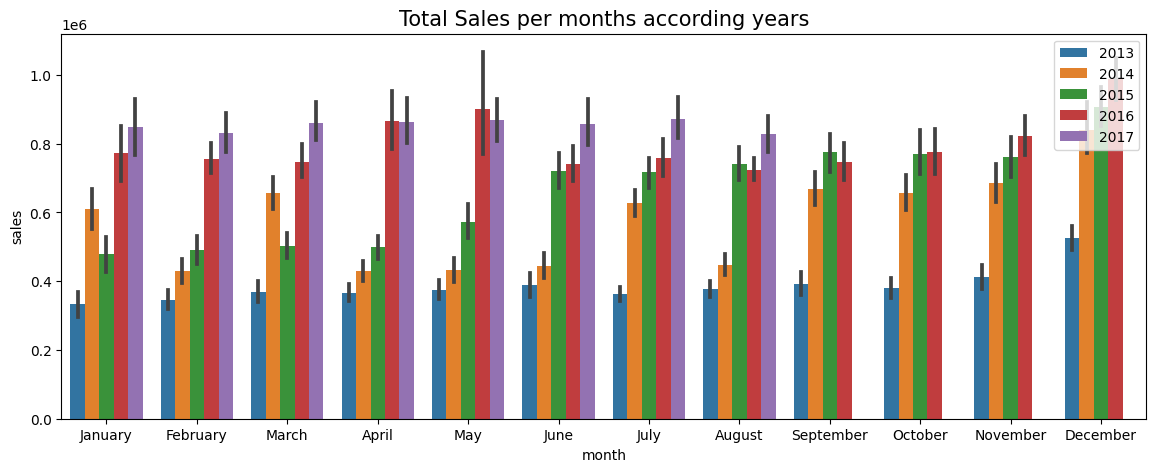

In [8]:
#Total Monthly Sales
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="month", y="sales",data=df,hue = 'année',)
a.set_title("Total Sales per months according years",fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [11]:
df_st_sa = df_store.groupby('store_nbr').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:5]
df_fa_sa = df_store.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:5]

# chart color
df_st_sa['color'] = '#334668'
df_st_sa['color'][2:] = '#C8D0DF'

# chart
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}]],
                    column_widths=[0.6, 0.4], vertical_spacing=0.6, horizontal_spacing=0.02,
                    subplot_titles=("Top 5 Highest Stores","Mix Top 5 Highest Product Sales"))



fig.add_trace(go.Pie(values=df_fa_sa['sales'], labels=df_fa_sa['family'], name='family',marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), #hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=2)
fig.add_trace(go.Bar(x=df_st_sa['sales'], y=[5,4,3,2,1,], marker=dict(color= df_st_sa['color']),
                     name='store_nbr', 
                     orientation='h',
                     text=df_st_sa['store_nbr']), 
                     row=1, col=1)


# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()


/tmp/ipykernel_9468/1569380856.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9468/1569380856.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [12]:
df_st_min = df_store.groupby('store_nbr').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=True)[:5]
df_fa_min = df_store.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=True)[:5]

# chart color
df_st_min['color'] = '#FED4C4'
df_st_min['color'][2:] = '#B82E2E'

# chart
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}]],
                    column_widths=[0.6, 0.4], vertical_spacing=0.6, horizontal_spacing=0.02,
                    subplot_titles=("Top 5 Lowest Stores","Mix Top 5 lowest Product Sales"))



fig.add_trace(go.Pie(values=df_fa_min['sales'], labels=df_fa_min['family'], name='family',marker=dict(colors=['#B82E2E','#D62728','#E45756','#FFA15A','#FED4C4']),
                     hoverinfo='label+percent+value', textinfo='label'), row=1, col=2)
fig.add_trace(go.Bar(x=df_st_sa['sales'], y=[5,4,3,2,1,], marker=dict(color= df_st_min['color']),
                     name='store_nbr', 
                     orientation='h',
                     text=df_st_min['store_nbr']), 
                     row=1, col=1)


# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()


/tmp/ipykernel_9468/3223325729.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9468/3223325729.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

